### EDA Content: 
- What are the top 10 Product categories based on sales?
- Who are the most valuable customers?
- In each country , which product is sold the most?
- Sales were highest on which day?
- Sales trend in the countries over time
- Top 5 Most common countries
- Top 5 Least common countries
- Total unit price sold by year
- Total quantity sold by invoiceno 
- Total quantity sold by Stockcode 
- StockCode Feature Analysis
- Description Feature Analysis


RFM Analysis - Time series analysis for marketing RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

In [0]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set()

In [0]:
retaildata = pd.read_excel("/content/online_retail_II.xlsx")

In [42]:
retaildata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [43]:
retaildata.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [44]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
print('Shape of dataset: ', retaildata.shape)

Shape of dataset:  (525461, 8)


In [0]:
def extract_column_types(df):
    num_cols = [i for i in df.columns if df[i].dtype in ['int64','float64']]
    cat_cols = [i for i in df.columns if df[i].dtype in ['object']]
    date_cols = [i for i in df.columns if df[i].dtype in ['datetime64[ns]']]
    bool_cols = [i for i in df.columns if df[i].dtype in ['bool']]
    return(num_cols,cat_cols,date_cols,bool_cols)

In [46]:
num_cols,cat_cols,date_cols,bool_cols = extract_column_types(retaildata)
print ("Numeric Columns:", len(num_cols))
print ("Categorical Columns:", len(cat_cols))
print ("Date Columns:",len(date_cols))
print ("Boolean Columns:",len(bool_cols))

Numeric Columns: 3
Categorical Columns: 4
Date Columns: 1
Boolean Columns: 0


In [0]:
#Filtering the dataset by choosing positive values of Quantity and retaildata
filtered_retaildata = retaildata[(retaildata.Quantity>0) & (retaildata.Price > 0)]

In [48]:
print('Shape of filtered dataset: ', filtered_retaildata.shape)

Shape of filtered dataset:  (511566, 8)


#### What are the top 10 Product categories based on sales?

In [0]:
prod_bought = filtered_retaildata.groupby('Description').agg({'Quantity':np.sum}).reset_index()

In [0]:
x = prod_bought.sort_values('Quantity' , ascending=False).Description.head(10)
y = prod_bought.sort_values('Quantity' , ascending=False).Quantity.head(10)

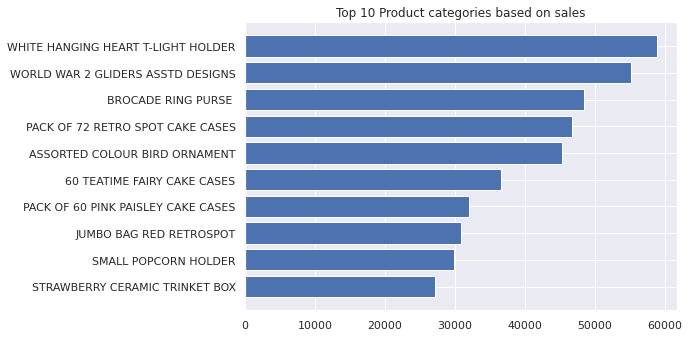

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x,y)
ax.invert_yaxis()
ax.set_title('Top 10 Product categories based on sales')
plt.show()

#### Product with highest sales in each country?

In [0]:
country_count = retaildata.groupby(['Country','Description']).agg({'Quantity':np.sum}).reset_index()

In [0]:
country_count.columns = ['Country','Description','Count']

In [60]:
filtered_retaildata['Revenue'] = filtered_retaildata.Price * filtered_retaildata.Quantity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
for i in country_count.Country.unique():
    temp = country_count[country_count.Country == i]
    prod = temp.Description[temp.Count == np.max(temp.Count)].values[0]
    count = np.max(temp.Count)
    revenue = np.round((np.sum(filtered_retaildata.Revenue[(filtered_retaildata.Description == prod) & (filtered_retaildata.Country == i)])),2)
    print ("Product with highest sales in {} is {} \n The sales count (in units) is : {} and revenue generated is {} ".format(i,prod,count,revenue))
    print('-----------------------------------------------------')

Product with highest sales in Australia is 60 CAKE CASES DOLLY GIRL DESIGN 
 The sales count (in units) is : 504 and revenue generated is 214.8 
-----------------------------------------------------
Product with highest sales in Austria is MINI HIGHLIGHTER PENS 
 The sales count (in units) is : 120 and revenue generated is 14.4 
-----------------------------------------------------
Product with highest sales in Bahrain is WHITE TALL PORCELAIN T-LIGHT HOLDER 
 The sales count (in units) is : 102 and revenue generated is 202.5 
-----------------------------------------------------
Product with highest sales in Belgium is PACK OF 60 MUSHROOM CAKE CASES 
 The sales count (in units) is : 264 and revenue generated is 145.2 
-----------------------------------------------------
Product with highest sales in Bermuda is BOYS ALPHABET IRON ON PATCHES 
 The sales count (in units) is : 1152 and revenue generated is 241.92 
-----------------------------------------------------
Product with highest 

In [62]:
filtered_retaildata.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [0]:
revenue_country_wise = filtered_retaildata.groupby('Country').agg({'Revenue':np.sum}).reset_index()

In [0]:
x1 = revenue_country_wise.sort_values('Revenue' , ascending=False).Country.head(10)
y1 = revenue_country_wise.sort_values('Revenue' , ascending=False).Revenue.head(10)

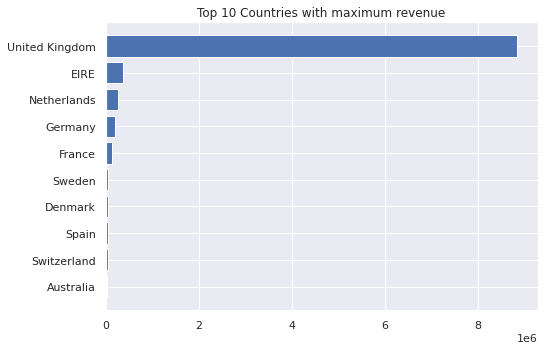

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x1,y1)
ax.invert_yaxis()
ax.set_title('Top 10 Countries with maximum revenue')
plt.show()

#### When were sales highest? On which day?

In [25]:
filtered_retaildata['InvoiceDateOnly'] = filtered_retaildata.InvoiceDate.apply(lambda x : x.date() )
date_sales = filtered_retaildata.groupby(['InvoiceDateOnly']).agg({'Quantity':np.sum}).reset_index()
date_sales = date_sales.sort_values(['Quantity'],ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
date_sales.head()

,InvoiceDateOnly,Quantity
243,2010-09-27,125534
202,2010-08-09,100236
57,2010-02-15,96591
83,2010-03-17,78885
36,2010-01-21,72914


In [27]:
print ("Highest sales occurred on {} ({} units).".format(date_sales.head(1).InvoiceDateOnly.values[0],date_sales.head(1).Quantity.values[0]))

Highest sales occurred on 2010-09-27 (125534 units).


In [28]:
print ("Lowest sales occurred on {} ({} units).".format(date_sales.tail(1).InvoiceDateOnly.values[0],date_sales.tail(1).Quantity.values[0]))

Lowest sales occurred on 2010-02-10 (3783 units).


#### Sale trends in  5 countries 

In [0]:
country_sales = filtered_retaildata.groupby(['Country']).agg({'Quantity':np.sum}).reset_index()
countries = country_sales.head(4).Country.tolist()

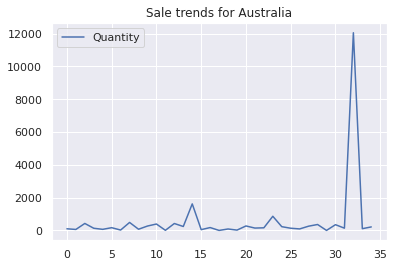

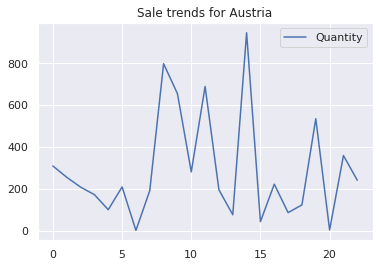

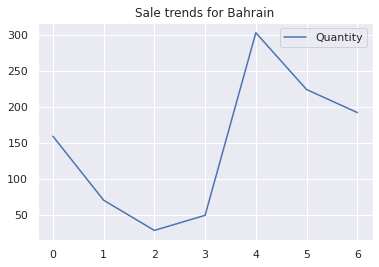

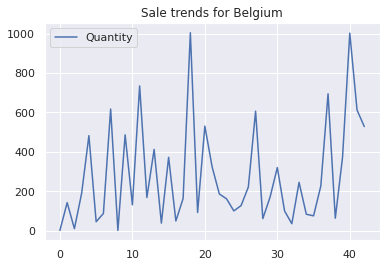

In [30]:
for country in countries:
    country_sales = filtered_retaildata[filtered_retaildata.Country ==country]
    temp = country_sales.groupby(['InvoiceDateOnly']).agg({'Quantity':np.sum}).reset_index()
    temp.plot(title=('Sale trends for '+country))
    plt.show()


### Top 5 Most common countries

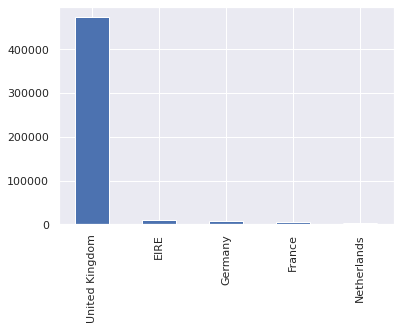

In [31]:
#Top 5 Most common countries
filtered_retaildata.Country.value_counts()[:5].plot(kind='bar')

### Top 5 least common countries

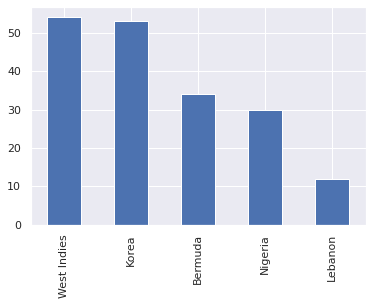

In [33]:
filtered_retaildata.Country.value_counts()[-5:].plot(kind='bar')

### Total unit price sold by year


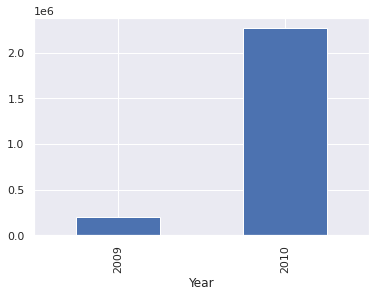

In [35]:
retaildata['Year'] = retaildata['InvoiceDate'].dt.year
retaildata.head()
retaildata.groupby('Year')['Price'].sum().plot(kind='bar')

### Total quantity sold by invoiceno [Top 10]


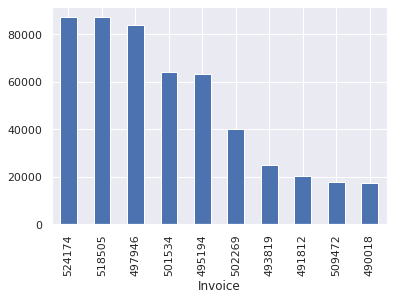

In [36]:

retaildata.groupby('Invoice')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

### Total quantity sold by Stock Code [Top 10]

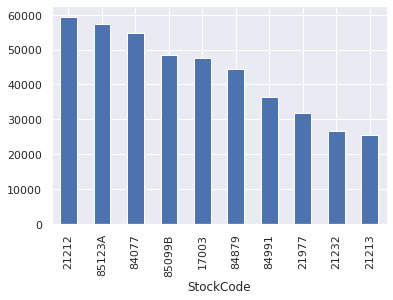

In [37]:
retaildata.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

#### StockCode 


In [66]:
retaildata.StockCode.nunique()

4632

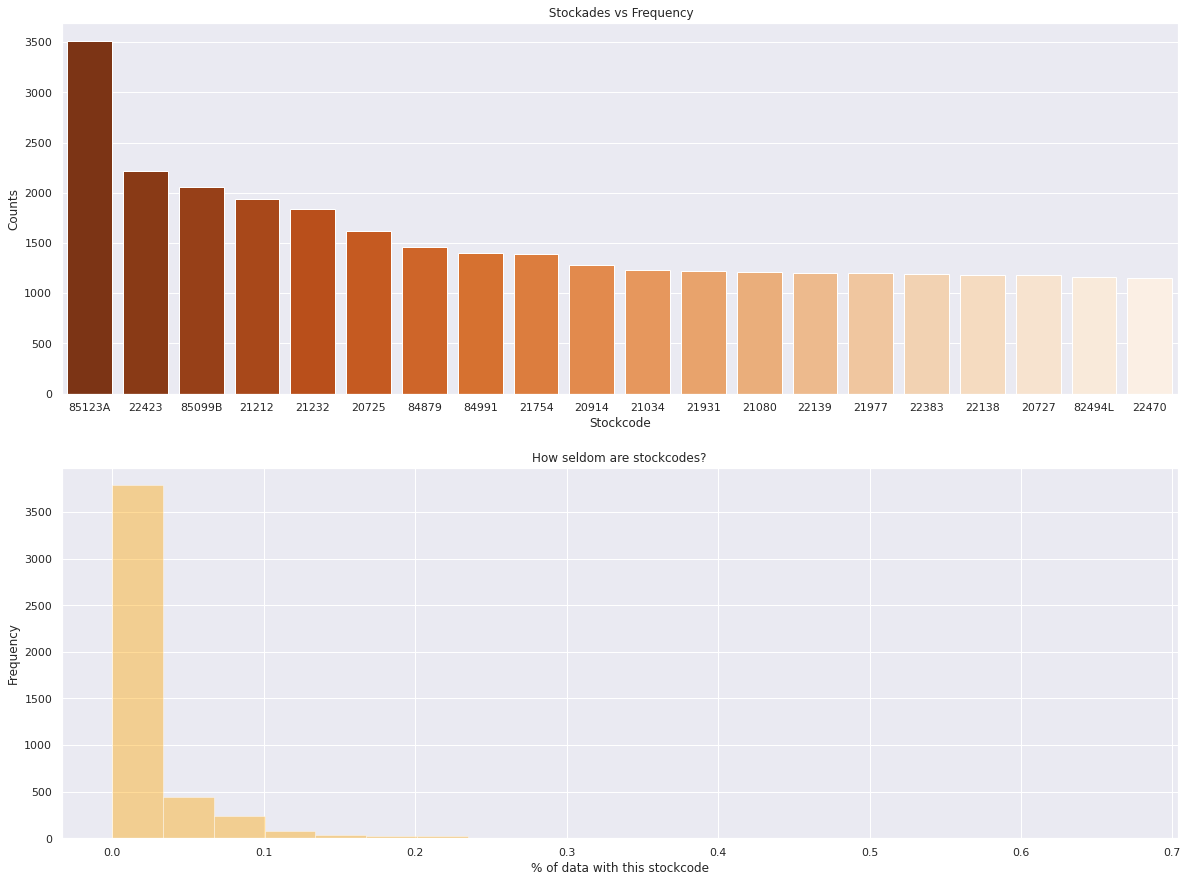

In [73]:
#Finding the Common StockCode
stockcode_counts = retaildata.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title(" Stockades vs Frequency");
sns.distplot(np.round(stockcode_counts/retaildata.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");

Most stockcodes are very seldom. This indicates that the retailer sells many different products and that there is no strong corelation of a specific stockcode



### Descriptions

In [75]:
#Unique number of Descriptions
retaildata.Description.nunique()

4681

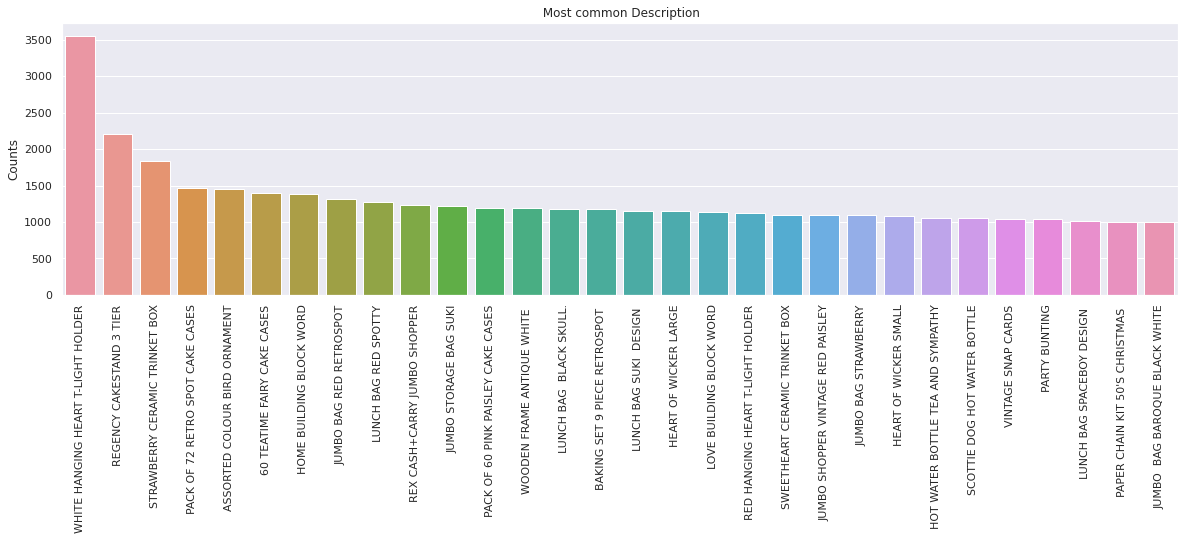

In [79]:
#Finding Common Descriptions
description_counts = retaildata.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values)
plt.ylabel("Counts")
plt.title(" Most common Description");
plt.xticks(rotation=90);

# RFM Analysis

#### Recency

In [0]:
from datetime import datetime,timedelta

In [0]:
maxdate = filtered_retaildata.InvoiceDateOnly.max()
filtered_retaildata['Recency'] = (maxdate - filtered_retaildata.InvoiceDateOnly)

/home/purvi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
filtered_retaildata['Recency'] = filtered_retaildata['Recency'].map(lambda x: x.days)

/home/purvi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
filtered_retaildata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDateOnly,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,373
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,373
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,373
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,373
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,373


In [0]:
recency = filtered_retaildata.loc[:,['Customer ID','Recency']]

In [0]:
recency.head()

,Customer ID,Recency
0,13085.0,373
1,13085.0,373
2,13085.0,373
3,13085.0,373
4,13085.0,373


Score: 

    1) to the least 25 %
    2) to the values in 26-50 %
    3) to the values in 51-75 %
    4) to the values in 76-100 %


In [0]:
recency['Recency_Score'] = pd.qcut(filtered_retaildata.Recency,q=[0,0.25,0.5,0.75,1],retbins=False,duplicates='drop',labels=False)

In [0]:
recency['Recency_Score'] = recency['Recency_Score']+1

In [0]:
recency.Recency_Score.value_counts()

1    129964
3    128805
4    126912
2    125885
Name: Recency_Score, dtype: int64

In [0]:
recency.head()

,Customer ID,Recency,Recency_Score
0,13085.0,373,4
1,13085.0,373,4
2,13085.0,373,4
3,13085.0,373,4
4,13085.0,373,4


#### Frequency in 1 year: Number of orders placed by a customer over a year 

In [0]:
one_year = filtered_retaildata[filtered_retaildata.Recency<=360]

In [0]:
one_year_freq = one_year.groupby(['Customer ID'])['Invoice'].nunique('Freq').to_frame().reset_index()

In [0]:
one_year_freq.columns = ['Customer ID', 'Freq']

In [0]:
one_year_freq.head()

,Customer ID,Freq
0,12346.0,11
1,12347.0,2
2,12348.0,1
3,12349.0,3
4,12351.0,1


In [0]:
x2 = one_year_freq.sort_values('Freq' , ascending=False)['Customer ID'].head(10)
y2 = one_year_freq.sort_values('Freq' , ascending=False).Freq.head(10)

In [0]:
x2 = x2.astype(str)

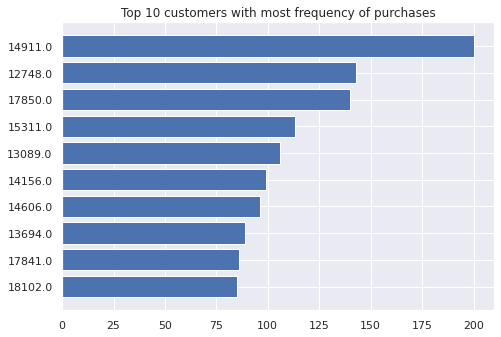

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x2,y2)
ax.invert_yaxis()
ax.set_title('Top 10 customers with most frequency of purchases')
plt.show()

In [0]:
one_year_freq['Frequency_Score'] =pd.qcut(one_year_freq.Freq,q=[0,0.25,0.5,0.75,1],retbins=False,duplicates='drop',labels=False)

In [0]:
one_year_freq['Frequency_Score'] = one_year_freq['Frequency_Score']+1

In [0]:
one_year_freq.head()

,Customer ID,Freq,Frequency_Score
0,12346.0,11,3
1,12347.0,2,1
2,12348.0,1,1
3,12349.0,3,2
4,12351.0,1,1


In [0]:
one_year_freq.Frequency_Score.value_counts()

1    2233
2    1115
3     884
Name: Frequency_Score, dtype: int64